<a href="https://colab.research.google.com/github/hhwan12/EPL-Man-City-Analysis/blob/main/EPL_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = '/content/English_Premier_League_data_2009-2019.csv'
df = pd.read_csv(file_path, encoding='UTF-8-SIG')

In [4]:
# Convert Date Column

df['Date'] = pd.to_datetime(df['Date'])
df['Season'] = df['Date'].dt.year

In [11]:
# Calculate Total Goals Per Season

season_goals = df.groupby('Season')[['FTHG', 'FTAG']].sum().reset_index()
# This creates a new data frame 'season_goals' which groups the total number of goals
# scored by home ('FTHG') and away ('FTAG') teams by each season

season_goals['TotalGoals'] = season_goals['FTHG'] + season_goals['FTAG']
# This creates a new column called 'TotalGoals' in the season_goals DataFrame.
# The column will contain the sum of goals scroed by the home and away teams.

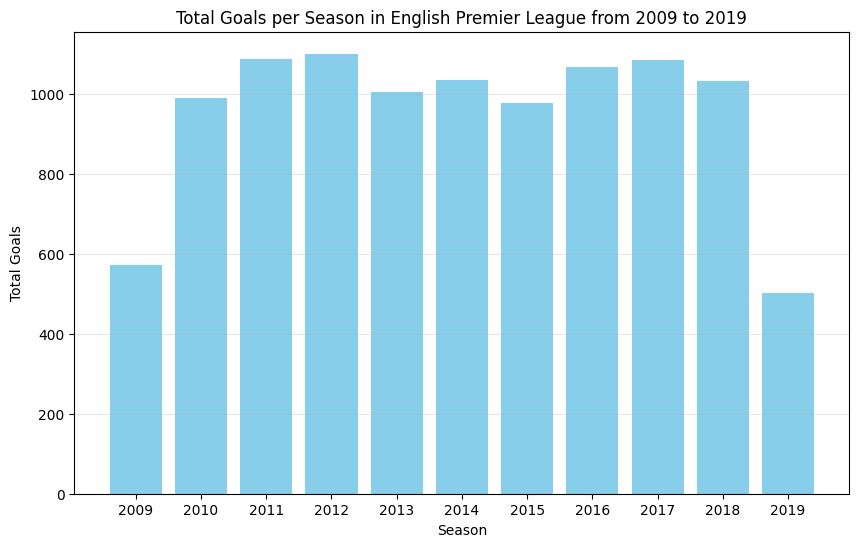

In [16]:
# Plotting a Visualization

plt.figure(figsize=(10,6))
plt.bar(season_goals['Season'], season_goals['TotalGoals'], color='skyblue')
# This creates a bar chart where the x-axis corresponds to the 'Season' column
# and the y-axis corresponds to the 'TotalGoals' column in the season_goals
# DataFrame
plt.title('Total Goals per Season in English Premier League from 2009 to 2019')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.xticks(season_goals['Season'])
# This ensures that each bar is labled with the corresponding season
plt.grid(axis='y', alpha=0.3)
plt.show()

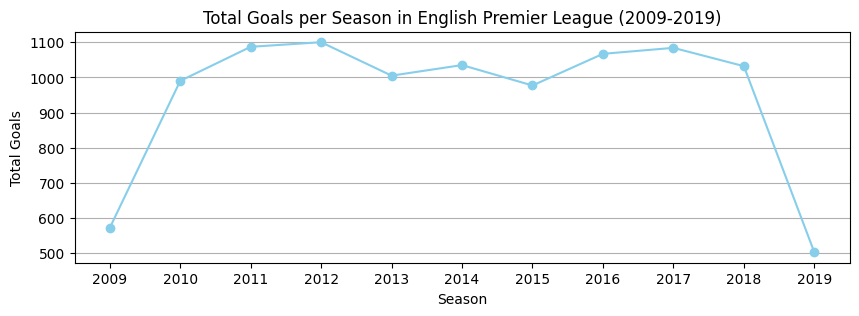

In [19]:
plt.figure(figsize=(10, 3))
plt.plot(season_goals['Season'], season_goals['TotalGoals'], marker='o', color='skyblue', linestyle='-')
plt.title('Total Goals per Season in English Premier League (2009-2019)')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.xticks(season_goals['Season'])
plt.grid(axis='y')
plt.show()

# Discussion

We observe a general trend of total goals increasing as the seasons progressed. However, there is a significant drop in total goals scored during 2019


The massive reduction in total goals in the English Premier League in 2019 could be due to several factors, such as:

- The implementation of VAR technology
- Increased focus on defensive strategies and tactical play
- Player fatigue from the 2018 World Cup as many top players had a shorter off-season, leading to physical and mental exhaustion, increased injuries, and less time to recover or train

# Modified Version

I realized that the EPL seasons span across two calendar years, starting in August and ending in May of the following year.

The following is a modified version of the analysis.

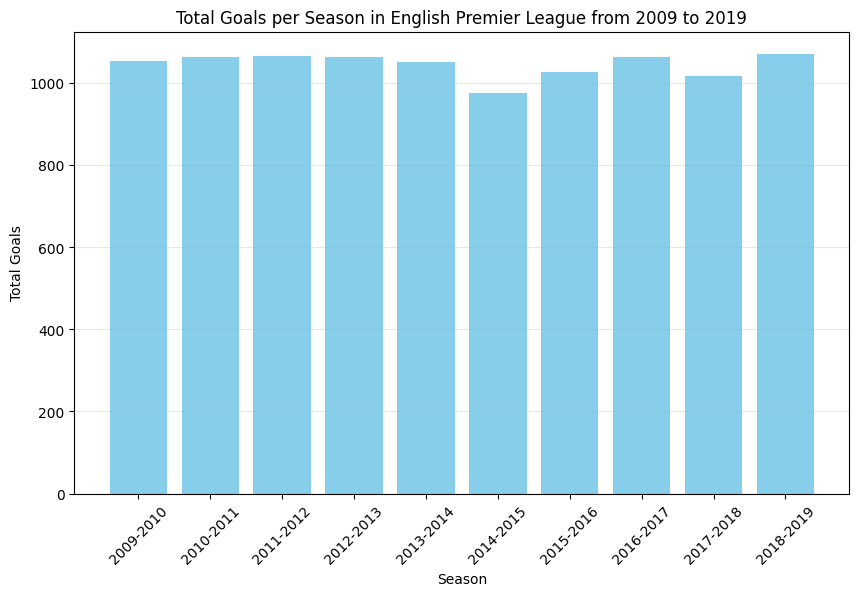

In [23]:
import pandas as df
import matplotlib.pyplot as plt

file_path = '/content/English_Premier_League_data_2009-2019.csv'
df = pd.read_csv(file_path, encoding='UTF-8-SIG')

df['Date'] = pd.to_datetime(df['Date'])
df['Season'] = df['Date'].apply(lambda x: f'{x.year}-{x.year + 1}' if x.month >= 8 else f'{x.year - 1}-{x.year}')
# If the month of the date (x.month) is August or later, the season corresponds to current year (x.year) and the next year (x.year + 1).
# (e.g., 2018-10-11 will be labled "2018-2019")
# If the month of the date (x.month) is before August, the season corresponds to the previous year and the current year
# (e.g., 2018-03-15 will be labled "2017-2018").

season_goals_new = df.groupby('Season')[['FTHG', 'FTAG']].sum().reset_index()
# This creates a new DataFram called season_goals_new which groups the total number of goals socred by both home and away teams by each season
season_goals_new['TotalGoals'] = season_goals_new['FTHG'] + season_goals_new['FTAG']
# This creates a new column called 'TotalGoals' in the season_goals_new DataFrame.
# The column will contain rows of the total goals scored by both teams for each season

plt.figure(figsize=(10,6))
plt.bar(season_goals_new['Season'], season_goals_new['TotalGoals'], color='skyblue')
# This creates a bar chart where the x-axis corresponds to the 'Season' column
# and the y-axis corresponds to the 'TotalGoals' column in the season_goals
# DataFrame
plt.title('Total Goals per Season in English Premier League from 2009 to 2019')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.xticks(season_goals_new['Season'], rotation=45)
# Added an x-axis rotation for better readability
plt.grid(axis='y', alpha=0.3)
plt.show()



The new analysis reveals that the number of goals scored has remained relatively consistent over the past decade.

# Man City Win Percentage After Pep Gaurdiola Became a Head Coach

In [15]:
import pandas as pd

file_path = '/content/English_Premier_League_data_2009-2019.csv'
df = pd.read_csv(file_path, encoding='UTF-8-SIG')

In [16]:
man_city_matches = df[(df['HomeTeam'] == 'Man City') | (df['AwayTeam'] == 'Man City')]
# This creates a new DataFrame that contains HomeTeam and AwayTeam columns whose values are only 'Man City'
man_city_matches = man_city_matches[man_city_matches['Date'] >= '2016-08-13']
# This filters the man_city_matches DataFrame to only include Man City matches on or after August 13, 2016 since
# that's the date Pep started his managerial position at Man City

In [17]:
man_city_wins = man_city_matches[(man_city_matches['HomeTeam'] == 'Man City') & (man_city_matches['FTR'] == 'H') |
                                 (man_city_matches['AwayTeam'] == 'Man City') & (man_city_matches['FTR'] == 'A')]
# This creates a new DateFrame man_city_wins that contains all the matches where Man City won, regardless they were playing home or away

In [21]:
total_games = man_city_matches.shape[0]
# This gets the number of rows the man_city_matches DataFrame contains, which translates to the total games Man City played since Pep joined them
total_wins = man_city_wins.shape[0]
# This gets the number of rows the man_city_wins DateFrame contains, which translates to the total games Man City won since Pep joined them
man_city_win_percentage = round((total_wins / total_games) * 100, 2)
print(man_city_win_percentage)

76.32
